# Data Sampling Methods

In [1]:
%pip install imblearn

     |████████████████████████████████| 199 kB 233 kB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


## Random Data Sampling
- Random sampling provides a naive technique for rebalancing the class distribution for an
imbalanced dataset.
- Random oversampling duplicates examples from the minority class in the training dataset
and can result in overfitting for some models.
- Random undersampling deletes examples from the majority class and can result in losing
information invaluable to a model.

### Random Oversampling
Random oversampling involves randomly duplicating examples from the minority class and
adding them to the training dataset. 

Examples from the training dataset are selected randomly
with replacement. 

This means that examples from the minority class can be chosen and added
to the new more balanced training dataset multiple times; 
they are selected from the original raining dataset, added to the new training dataset, 
and then returned or replaced in the original
dataset, allowing them to be selected again.

In [3]:
# example of evaluating a decision tree with random oversampling
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler
# define dataset
X, y = make_classification(n_samples=10000, weights=[0.99], flip_y=0)
# define pipeline
steps = [( ' over ' , RandomOverSampler()), ( ' model ' , DecisionTreeClassifier())]
pipeline = Pipeline(steps=steps)
# evaluate pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(pipeline, X, y, scoring= 'f1_micro' , cv=cv, n_jobs=-1)
score = mean(scores)
print( ' F-measure: %.3f ' % score)

 F-measure: 0.994 


### Random Undersampling

Random undersampling involves randomly selecting examples from the majority class to delete
from the training dataset. This has the effect of reducing the number of examples in the majority
class in the transformed version of the training dataset. This process can be repeated until the
desired class distribution is achieved, such as an equal number of examples for each class.

In [4]:
# example of evaluating a decision tree with random undersampling
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from imblearn.pipeline import Pipeline
from imblearn.under_sampling import RandomUnderSampler
# define dataset
X, y = make_classification(n_samples=10000, weights=[0.99], flip_y=0)
# define pipeline
steps = [( ' under ' , RandomUnderSampler()), ( ' model ' , DecisionTreeClassifier())]
pipeline = Pipeline(steps=steps)
# evaluate pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(pipeline, X, y, scoring= 'f1_micro' , cv=cv, n_jobs=-1)
score = mean(scores)
print( ' F-measure: %.3f ' % score)

 F-measure: 0.883 


## Over Sampling Methods

- How the SMOTE synthesizes new examples for the minority class.
- How to correctly fit and evaluate machine learning models on SMOTE-transformed training
datasets.
- How to use extensions of the SMOTE that generate synthetic examples along the class
decision boundary.

### SMOTE for Balancing Data

SMOTE works by selecting examples that are close in the
feature space, drawing a line between the examples in the feature space and drawing a new
sample at a point along that line.

SMOTE first selects a minority class instance a at random and finds its k nearest
minority class neighbors. 

The synthetic instance is then created by choosing one of
the k nearest neighbors b at random and connecting a and b to form a line segment
in the feature space. 

The synthetic instances are generated as a convex combination
of the two chosen instances a and b.

Counter({0: 9900, 1: 100})
Counter({0: 9900, 1: 9900})


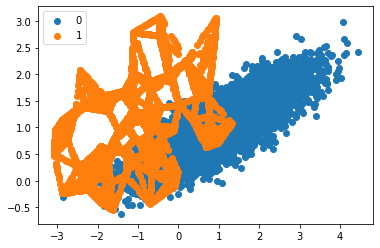

In [5]:
# Oversample and plot imbalanced dataset with SMOTE
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
from matplotlib import pyplot
from numpy import where
# define dataset
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)
# summarize class distribution
counter = Counter(y)
print(counter)
# transform the dataset
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)
# summarize the new class distribution
counter = Counter(y)
print(counter)
# scatter plot of examples by class label
for label, _ in counter.items():
    row_ix = where(y == label)[0]
    pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()

### SMOTE for Classification

You could explore testing different ratios of the minority class and majority class (e.g.
changing the sampling strategy argument) to see if a further lift in performance is possible.

Another area to explore would be to test different values of the k-nearest neighbors selected
in the SMOTE procedure when each new synthetic example is created. 

The default is k = 5,
although larger or smaller values will influence the types of examples created, and in turn, may
impact the performance of the model. 

For example, we could grid search a range of values of k,
such as values from 1 to 7, and evaluate the pipeline for each value.

In [6]:
# grid search k value for SMOTE oversampling for imbalanced classification
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
# define dataset
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)
# values to evaluate
k_values = [1, 2, 3, 4, 5, 6, 7]
for k in k_values:
    # define pipeline
    model = DecisionTreeClassifier()
    over = SMOTE(sampling_strategy=0.1, k_neighbors=k)
    pipeline = Pipeline(steps=[( ' over ' , over), ( ' model ' , model)])
    # evaluate pipeline
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(pipeline, X, y, scoring= 'roc_auc' , cv=cv, n_jobs=-1)
    score = mean(scores)
    print( ' > k=%d, Mean ROC AUC: %.3f ' % (k, score))

 > k=1, Mean ROC AUC: 0.774 
 > k=2, Mean ROC AUC: 0.788 
 > k=3, Mean ROC AUC: 0.810 
 > k=4, Mean ROC AUC: 0.822 
 > k=5, Mean ROC AUC: 0.815 
 > k=6, Mean ROC AUC: 0.827 
 > k=7, Mean ROC AUC: 0.813 


### SMOTE With Selective Sample Generation
We can be selective about the examples in the minority class that are oversampled using SMOTE.

#### Borderline-SMOTE
A popular extension to SMOTE involves selecting those instances of the minority class that are
misclassified, such as with a k-nearest neighbor classification model. We can then oversample
just those difficult instances, providing more resolution only where it may be required.

Counter({0: 9900, 1: 100})
Counter({0: 9900, 1: 9900})


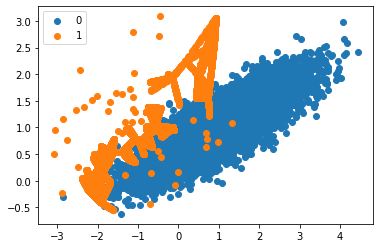

In [28]:
from imblearn.over_sampling import BorderlineSMOTE
# define dataset
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)

# summarize class distribution
counter = Counter(y)
print(counter)
# transform the dataset
oversample = BorderlineSMOTE()
X, y = oversample.fit_resample(X, y)
# summarize the new class distribution
counter = Counter(y)
print(counter)
# scatter plot of examples by class label
for label, _ in counter.items():
    row_ix = where(y == label)[0]
    pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()

#### Borderline-SMOTE SVM
A SVM is used to locate the decision boundary defined by the support vectors
and examples in the minority class that are close to the support vectors become the focus for
generating synthetic examples.

Counter({0: 9900, 1: 100})
Counter({0: 9900, 1: 9900})


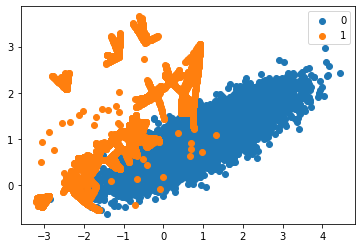

In [27]:
from imblearn.over_sampling import SVMSMOTE
# define dataset
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)

# summarize class distribution
counter = Counter(y)
print(counter)
# transform the dataset
oversample = SVMSMOTE()
X, y = oversample.fit_resample(X, y)
# summarize the new class distribution
counter = Counter(y)
print(counter)
# scatter plot of examples by class label
for label, _ in counter.items():
    row_ix = where(y == label)[0]
    pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()

#### Adaptive Synthetic Sampling (ADASYN)

ADASYN is based on the idea of adaptively generating minority data samples
according to their distributions: more synthetic data is generated for minority class
samples that are harder to learn compared to those minority samples that are easier
to learn.

The key idea of ADASYN algorithm is to use a density distribution as a criterion to
automatically decide the number of synthetic samples that need to be generated for
each minority data example.

Counter({0: 9900, 1: 100})
Counter({0: 9900, 1: 9899})


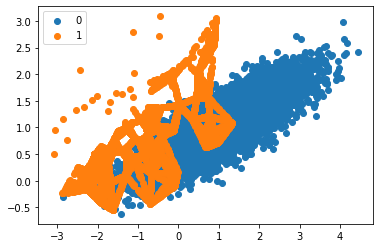

In [26]:
from imblearn.over_sampling import ADASYN
# define dataset
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)

# summarize class distribution
counter = Counter(y)
print(counter)
# transform the dataset
oversample = ADASYN()
X, y = oversample.fit_resample(X, y)
# summarize the new class distribution
counter = Counter(y)
print(counter)
# scatter plot of examples by class label
for label, _ in counter.items():
    row_ix = where(y == label)[0]
    pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()

## Undersampling Methods
- How to use the Near-Miss and Condensed Nearest Neighbor Rule methods that select
examples to keep in the majority class.
- How to use Tomek Links and the Edited Nearest Neighbors Rule methods that select
examples to delete from the majority class.
- How to use One-Sided Selection and the Neighborhood Cleaning Rule that combine
methods for choosing examples to keep and delete from the majority class.

### Methods that Select Examples to Keep
we will take a closer look at two methods that choose which examples from the
majority class to keep, the near-miss family of methods, and the popular condensed nearest
neighbor rule.

#### Near Miss Undersampling

Near Miss refers to a collection of undersampling methods that select examples based on the
distance of majority class examples to minority class examples.

There are three versions of
the technique, named NearMiss-1, NearMiss-2, and NearMiss-3.

- NearMiss-1: Majority class examples with minimum average distance to three closest
minority class examples.
- NearMiss-2: Majority class examples with minimum average distance to three furthest
minority class examples.
- NearMiss-3: Majority class examples with minimum distance to each minority class
example.

Counter({0: 9900, 1: 100})
Counter({0: 100, 1: 100})


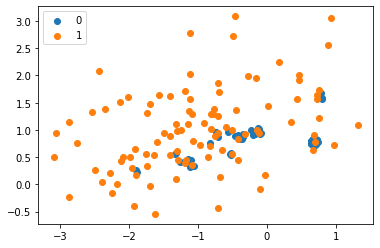

In [25]:
from imblearn.under_sampling import NearMiss
from numpy import where
# define dataset
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)

# summarize class distribution
counter = Counter(y)
print(counter)
# define the undersampling method
undersample = NearMiss(version=1, n_neighbors=3)
# transform the dataset
X, y = undersample.fit_resample(X, y)
# summarize the new class distribution
counter = Counter(y)
print(counter)
# scatter plot of examples by class label
for label, _ in counter.items():
    row_ix = where(y == label)[0]
    pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()

Counter({0: 9900, 1: 100})
Counter({0: 100, 1: 100})


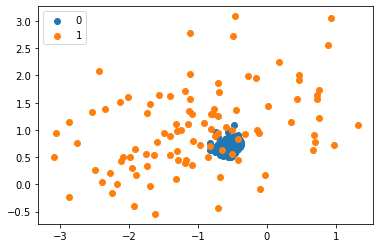

In [24]:
# define dataset
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)

# summarize class distribution
counter = Counter(y)
print(counter)
# define the undersampling method
undersample = NearMiss(version=2, n_neighbors=3)
# transform the dataset
X, y = undersample.fit_resample(X, y)
# summarize the new class distribution
counter = Counter(y)
print(counter)
# scatter plot of examples by class label
for label, _ in counter.items():
    row_ix = where(y == label)[0]
    pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()

Counter({0: 9900, 1: 100})
Counter({0: 100, 1: 100})


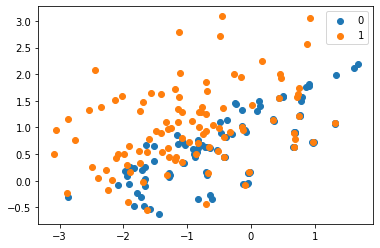

In [23]:
# define dataset
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)

# summarize class distribution
counter = Counter(y)
print(counter)
# define the undersampling method
undersample = NearMiss(version=3, n_neighbors_ver3=3)
# transform the dataset
X, y = undersample.fit_resample(X, y)
# summarize the new class distribution
counter = Counter(y)
print(counter)
# scatter plot of examples by class label
for label, _ in counter.items():
    row_ix = where(y == label)[0]
    pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()

#### Condensed Nearest Neighbor Rule Undersampling

Condensed Nearest Neighbors, or CNN for short, is an undersampling technique that seeks a
subset of a collection of samples that results in no loss in model performance, referred to as a
minimal consistent set.

Counter({0: 9900, 1: 100})
Counter({0: 186, 1: 100})


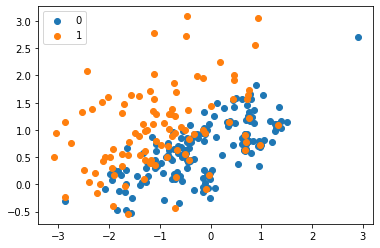

In [22]:
from imblearn.under_sampling import CondensedNearestNeighbour
# define dataset
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)

# summarize class distribution
counter = Counter(y)
print(counter)
# define the undersampling method
undersample = CondensedNearestNeighbour(n_neighbors=1)
# transform the dataset
X, y = undersample.fit_resample(X, y)
# summarize the new class distribution
counter = Counter(y)
print(counter)
# scatter plot of examples by class label
for label, _ in counter.items():
    row_ix = where(y == label)[0]
    pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()

### Methods that Select Examples to Delete
we will take a closer look at methods that select examples from the majority
class to delete, including the popular Tomek Links method and the Edited Nearest Neighbors
rule.

#### Tomek Links for Undersampling
The procedure for finding Tomek Links can be used to locate all cross-class nearest neighbors.
If the examples in the minority class are held constant, the procedure can be used to find all of
those examples in the majority class that are closest to the minority class, then removed. These
would be the ambiguous examples.

Counter({0: 9900, 1: 100})
Counter({0: 9874, 1: 100})


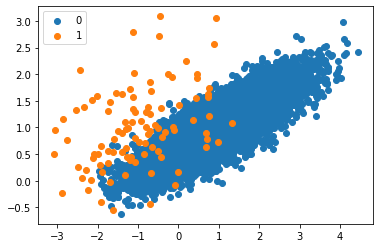

In [21]:
from imblearn.under_sampling import TomekLinks
# define dataset
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)

# summarize class distribution
counter = Counter(y)
print(counter)
# define the undersampling method
undersample = TomekLinks()
# transform the dataset
X, y = undersample.fit_resample(X, y)
# summarize the new class distribution
counter = Counter(y)
print(counter)
# scatter plot of examples by class label
for label, _ in counter.items():
    row_ix = where(y == label)[0]
    pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()

#### Edited Nearest Neighbors Rule for Undersampling
Another rule for finding ambiguous and noisy examples in a dataset is called Edited Nearest
Neighbors, or sometimes ENN for short. 

This rule involves using k = 3 nearest neighbors to
locate those examples in a dataset that are misclassified and that are then removed before a
k = 1 classification rule is applied.

Counter({0: 9900, 1: 100})
Counter({0: 9806, 1: 100})


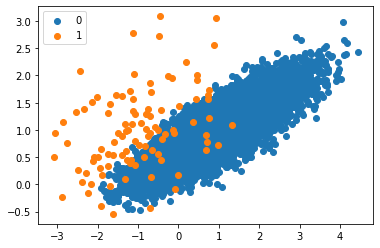

In [20]:
from imblearn.under_sampling import EditedNearestNeighbours
# define dataset
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)

# summarize class distribution
counter = Counter(y)
print(counter)
# define the undersampling method
undersample = EditedNearestNeighbours(n_neighbors=3)
# transform the dataset
X, y = undersample.fit_resample(X, y)
# summarize the new class distribution
counter = Counter(y)
print(counter)
# scatter plot of examples by class label
for label, _ in counter.items():
    row_ix = where(y == label)[0]
    pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()

### Combinations of Keep and Delete Methods

#### One-Sided Selection for Undersampling
One-Sided Selection, or OSS for short, is an undersampling technique that combines Tomek Links
and the Condensed Nearest Neighbor (CNN) Rule. 

Specifically, Tomek Links are ambiguous
points on the class boundary and are identified and removed in the majority class. 

The CNN
method is then used to remove redundant examples from the majority class that are far from
the decision boundary.

Counter({0: 9900, 1: 100})
Counter({0: 851, 1: 100})


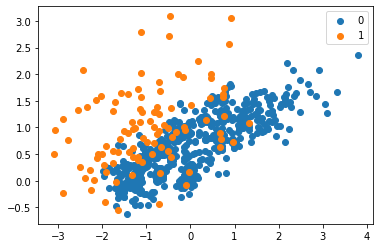

In [18]:
from imblearn.under_sampling import OneSidedSelection
# define dataset
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)
# summarize class distribution
# summarize class distribution
counter = Counter(y)
print(counter)
# define the undersampling method
undersample = OneSidedSelection(n_neighbors=1, n_seeds_S=200)
# transform the dataset
X, y = undersample.fit_resample(X, y)
# summarize the new class distribution
counter = Counter(y)
print(counter)
# scatter plot of examples by class label
for label, _ in counter.items():
    row_ix = where(y == label)[0]
    pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()

#### Neighborhood Cleaning Rule for Undersampling
The Neighborhood Cleaning Rule, or NCR for short, is an undersampling technique that
combines both the Condensed Nearest Neighbor (CNN) Rule to remove redundant examples
and the Edited Nearest Neighbors (ENN) Rule to remove noisy or ambiguous examples.

Like One-Sided Selection (OSS), the CNN method is applied in a one-step manner, then
the examples that are misclassified according to a KNN classifier are removed, as per the ENN
rule. 

Unlike OSS, less of the redundant examples are removed and more attention is placed on
cleaning those examples that are retained. The reason for this is to focus less on improving the
balance of the class distribution and more on the quality (unambiguity) of the examples that
are retained in the majority class.

Counter({0: 9900, 1: 100})
Counter({0: 9786, 1: 100})


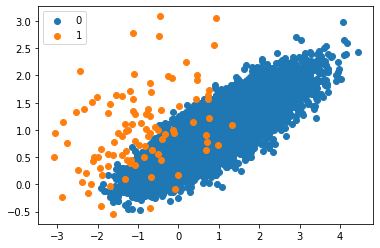

In [17]:
from imblearn.under_sampling import NeighbourhoodCleaningRule
# define dataset
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)
# summarize class distribution
# summarize class distribution
counter = Counter(y)
print(counter)
# define the undersampling method
undersample = NeighbourhoodCleaningRule(n_neighbors=3, threshold_cleaning=0.5)
# transform the dataset
X, y = undersample.fit_resample(X, y)
# summarize the new class distribution
counter = Counter(y)
print(counter)
# scatter plot of examples by class label
for label, _ in counter.items():
    row_ix = where(y == label)[0]
    pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()

## Oversampling and Undersampling
- How to define a sequence of oversampling and undersampling methods to be applied to a
training dataset or when evaluating a classifier model.
- How to manually combine oversampling and undersampling methods for imbalanced
classification.
- How to use pre-defined and well-performing combinations of sampling methods for imbal-
anced classification.

### Binary Test Problem and Decision Tree Model

In [2]:
# evaluates a decision tree model on the imbalanced dataset
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
# generate 2 class dataset
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)
# define model
model = DecisionTreeClassifier()
# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(model, X, y, scoring= 'roc_auc' , cv=cv, n_jobs=-1)
# summarize performance
print( ' Mean ROC AUC: %.3f ' % mean(scores))

 Mean ROC AUC: 0.769 


### Manually Combine Data Sampling Methods
The imbalanced-learn Python library provides a range of sampling techniques, as well as a
Pipeline class that can be used to create a combined sequence of sampling methods to apply to
a dataset. We can use the Pipeline to construct a sequence of oversampling and undersampling
techniques to apply to a dataset

In [ ]:
# define model
model = ...
# define sampling
over = ...
under = ...
# define pipeline
pipeline = Pipeline(steps=[( ' o ' , over), ( ' u ' , under), ( ' m ' , model)])

### Standard Combined Data Sampling Methods
There are combinations of oversampling and undersampling methods that have proven effective
and together may be considered sampling techniques.

#### SMOTE and Tomek Links Undersampling

SMOTE is an oversampling method that synthesizes new plausible examples in the minority
class. 

Tomek Links refers to a method for identifying pairs of nearest neighbors in a dataset
that have different classes. 

Removing one or both of the examples in these pairs (such as the
examples in the majority class) has the effect of making the decision boundary in the training
dataset less noisy or ambiguous.

In [16]:
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import TomekLinks
# generate dataset
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)
# define model
model = DecisionTreeClassifier()
# define sampling
resample = SMOTETomek(tomek=TomekLinks(sampling_strategy= 'majority' ))
# define pipeline
pipeline = Pipeline(steps=[( 'r' , resample), ( ' m ' , model)])
# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(pipeline, X, y, scoring= 'roc_auc' , cv=cv, n_jobs=-1)
# summarize performance
print( ' Mean ROC AUC: %.3f ' % mean(scores))

 Mean ROC AUC: 0.804 


#### SMOTE and Edited Nearest Neighbors Undersampling


In [15]:
from imblearn.combine import SMOTEENN
# generate dataset
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)
# define model
model = DecisionTreeClassifier()
# define sampling
resample = SMOTEENN()

'''
We could change the ENN to only remove examples
from the majority class by setting the enn argument to an EditedNearestNeighbours instance
with sampling strategy argument set to ‘majority’.
'''
#resample = SMOTEENN(enn=EditedNearestNeighbours(sampling_strategy= ' majority ' ))

# define pipeline
pipeline = Pipeline(steps=[( ' r ' , resample), ( ' m ' , model)])
# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(pipeline, X, y, scoring= 'roc_auc' , cv=cv, n_jobs=-1)
# summarize performance
print( ' Mean ROC AUC: %.3f ' % mean(scores))

 Mean ROC AUC: 0.856 
